In [3]:
import os
import cv2
import json
import random
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

%matplotlib inline

In [94]:
# variables
data_root_dir = 'C:/Users/Thep Ho/Desktop/Thesis/data/'

In [95]:
image = plt.imread('C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/img/nt-72.jpg')
mask = plt.imread('C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/mask/nt-72.jpg')

cols, rows = image.shape[:2]
tx, ty = (70, 70)

# rotation
M1 = np.array([[1, 0, -tx], [0, 1, ty]], dtype=np.float32)

M5 = cv2.getRotationMatrix2D(center = (cols/2,rows/2), angle=-35, scale=1)

M8 = cv2.getRotationMatrix2D(center = (0, 0), angle=-20, scale=1)

In [85]:
# flip image
M5 = cv2.getRotationMatrix2D(center = (cols/2,rows/2), angle=-35, scale=1)
def flip(img, axes):
    if (axes == 0) :
        #horizental flip
        return cv2.flip( img, 0 )
    elif(axes == 1):
        #vertical flip
        return cv2.flip( img, 1 )
    elif(axes == -1):
        #both direction
        return cv2.flip( img, -1 ) 

tran_img_1 = cv2.warpAffine(image, M5, (cols, rows))
tran_img_2 = cv2.warpAffine(image, M5, (cols, rows))

tran_mask_1 = cv2.warpAffine(mask, M5, (cols, rows))
tran_mask_2 = cv2.warpAffine(mask, M5, (cols, rows))

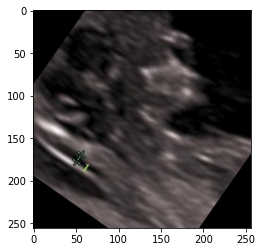

In [86]:
plt.imshow(tran_img_2)

In [87]:
def brightness(img, low, high):
    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [104]:
image1 = plt.imread('C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/img/nt-72.jpg')

M1 = cv2.getRotationMatrix2D(center = (cols/2,rows/2), angle=-30, scale=1)
M2 = cv2.getRotationMatrix2D(center = (cols/2,rows/2), angle=-60, scale=1)
M3 = cv2.getRotationMatrix2D(center = (cols/2,rows/2), angle=-90, scale=1)
M4 = cv2.getRotationMatrix2D(center = (cols/2,rows/2), angle=-120, scale=1)

tran_img_1 = cv2.warpAffine(image, M1, (cols, rows))
tran_img_2 = cv2.warpAffine(image, M2, (cols, rows))
tran_img_3 = cv2.warpAffine(image, M3, (cols, rows))
tran_img_4 = cv2.warpAffine(image, M4, (cols, rows))

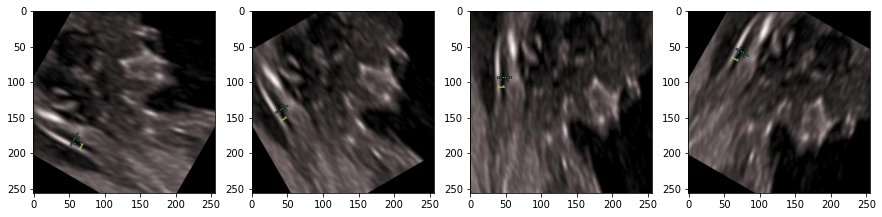

In [105]:
fig, arr = plt.subplots(1, 4, figsize=(15, 15))
arr[0].imshow(tran_img_1)
arr[1].imshow(tran_img_2)
arr[2].imshow(tran_img_3)
arr[3].imshow(tran_img_4)


In [92]:
fig.savefig('Ảnh xoay với các góc khác nhau.png')

In [53]:
tran_img = flip(image, 0)
tran_mask = flip(mask, 0)

In [76]:
tran_img = cv2.warpAffine(image, M1, (cols, rows))
tran_mask = cv2.warpAffine(mask, M1, (cols, rows))

In [2]:
def fill(img, h, w):
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img
        
def horizontal_shift(img, ratio=0.0):
    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]
    img = fill(img, h, w)
    return img

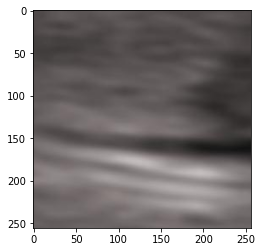

In [7]:
img = plt.imread('C:/Users/Thep Ho/Desktop/Thesis/z-results/sp4/1.jpg')
plt.imshow(img)

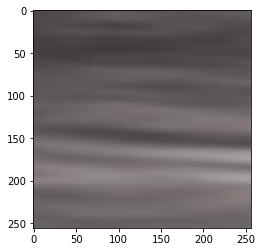

In [8]:
img = horizontal_shift(img, 0.7)
plt.imshow(img)

In [4]:
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'contour')

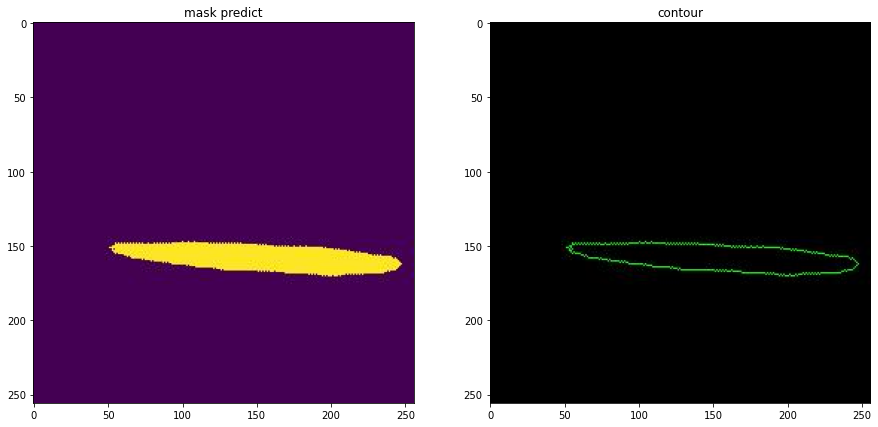

In [2]:
mas = plt.imread('C:/Users/Thep Ho/Desktop/Thesis/z-results/sp4/2.jpg')
con = plt.imread('C:/Users/Thep Ho/Desktop/Thesis/z-results/sp4/3.jpg')

fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(mas)
arr[0].set_title('mask predict')
arr[1].imshow(con)
arr[1].set_title('contour')

In [ ]:
fig.savefig('C:/Users/Thep Ho/Desktop/Thesis/z-results/sp4/Ảnh chuyển thành contour.png')

Text(0.5, 1.0, 'Rotation mask 30 deg')

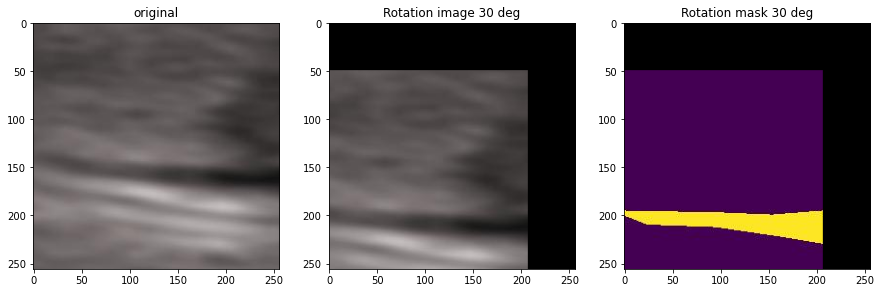

In [77]:
fig, arr = plt.subplots(1, 3, figsize=(15, 15))
arr[0].imshow(image)
arr[0].set_title('original')
arr[1].imshow(tran_img)
arr[1].set_title('Rotation image 30 deg')
arr[2].imshow(tran_mask)
arr[2].set_title('Rotation mask 30 deg')

In [74]:
fig.savefig('Dịch chuyển ảnh.png')

### Image to mask coco

In [15]:
# make mask from imgs
def make_masks(annotation_file, masks_dir):
	# read annotation file
	coco_label = json.load(open(annotation_file))
	# create coco object
	coco = COCO(annotation_file)
	for i in range(0, len(coco_label['images'])):
		
		# set file name for mask
		img_infor = coco.imgs[i]

		# 18 is the number of noise characters in the file nam in annotation file
		img_file_name = img_infor['file_name'][18:]

		img_ids = coco.getCatIds()
		anns_ids = coco.getAnnIds(imgIds=i, catIds=img_ids, iscrowd=None)

		anns = coco.loadAnns(anns_ids)
		mask = coco.annToMask(anns[0])


		if (len(anns) == 1):	
			mask = coco.annToMask(anns[0])
			plt.imsave(masks_dir + img_file_name, mask)

		
		if (len(anns) == 2):	
			mask = coco.annToMask(anns[1])
			plt.imsave(masks_dir + img_file_name, mask)

### Rename, check dup

In [41]:
root_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/all/'
files_img = os.listdir(root_path + 'images')
files_mask = os.listdir(root_path + 'masks')

files_img = sorted(files_img)
files_mask = sorted(files_mask)

for img in files_img:
    if (img not in files_mask):
        print(img)

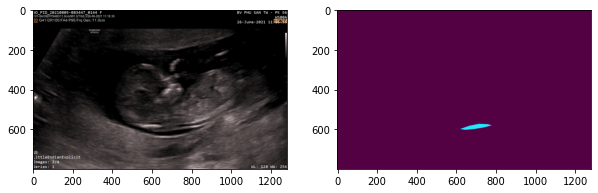

In [39]:
index = 123
img = root_path + 'images/' + files_img[index]
mask = root_path + 'mask/' + files_mask[index]


plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(img))
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(mask))

In [9]:
files = os.listdir('C:/Users/Thep Ho/Desktop/Thesis/sub-task/all/mask')

print(len(files))
print(files[5])

737
09062021-083317_20210621145827_2.png


In [54]:
# rename imgs
files_extension = '.jpg'
def rename_imgs(new_name, path_obj_needs_to_be_renamed):
	files = os.listdir(path_obj_needs_to_be_renamed)
	for i in range(0, len(files)):
		os.rename(path_obj_needs_to_be_renamed + '/' + files[i], path_obj_needs_to_be_renamed + '/' + new_name + str(i + 1) + files_extension)

In [55]:
rename_imgs('nt-', 'C:/Users/Thep Ho/Desktop/Thesis/data/cus/256x256-notmark/images')

In [2]:
# check if imgs folder and masks folder has a not same name
image_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/img'
mask_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/mask'
def check_all_to_same_name(imgs_file_path, masks_file_path):
	imgs_files = os.listdir(imgs_file_path)
	masks_files = os.listdir(masks_file_path)
	for i in range(0, len(imgs_files)):
		if (imgs_files[i] != masks_files[i]):
			print(imgs_files[i], '!=', masks_files[i], end='\n')
			print('Error: imgs and masks are not the same name')
			break
	return 'True'

In [3]:
check_all_to_same_name(image_path, mask_path)

nt-root-47.png != nt-root-44.png
Error: imgs and masks are not the same name


'True'

In [20]:
imgs_file_path = data_root_dir + 'own-custom-data/imgs'
masks_file_path = data_root_dir + 'own-custom-data/masks'
check_all_to_same_name(imgs_file_path, masks_file_path)

'True'

### Get response mask

In [ ]:
count = 0
for i in os.listdir(image_path):
    if (i in os.listdir(data_root_path)):
        # copy to mask_path
        shutil.copy(data_root_path + '/' + i, mask_path)
        
print(count)

### Data augmentation

In [1]:
root_path = 'C:/Users/Thep Ho/Desktop/Thesis/data/cus/256x256-notmark/'
files_img = os.listdir(root_path + 'images')

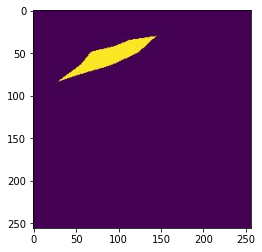

In [5]:
img = plt.imshow(plt.imread(root_path + 'masks/' + files_img[20]))

In [6]:
# rotation
for (index, item) in enumerate(files_img):
    image = plt.imread(root_path + 'images/' + item)
    mask = plt.imread(root_path + 'masks/' + item)

    cols, rows = image.shape[:2]
    M1 = cv2.getRotationMatrix2D(center = (cols/2,rows/2), angle=random.randint(-90, 90), scale=1)   

    tran_img = cv2.warpAffine(image, M1, (cols, rows), borderMode=cv2.BORDER_REPLICATE)
    tran_mask = cv2.warpAffine(mask, M1, (cols, rows), borderMode=cv2.BORDER_REPLICATE)

    plt.imsave(root_path + 'aug/' + 'nt-rotation-' + str(index + 1) + '.jpg', tran_img)
    plt.imsave(root_path + 'augM/' + 'nt-rotation-' + str(index + 1) + '.jpg', tran_mask)

In [7]:
# flip
for (index, item) in enumerate(files_img):
    if (item.split('-')[1] == 'rotation'):
        continue
    
    image = plt.imread(root_path + 'images/' + item)
    mask = plt.imread(root_path + 'masks/' + item)

    image = cv2.flip(image, -1)
    mask = cv2.flip(mask, -1)

    plt.imsave(root_path + 'aug/' + 'nt-flip-' + str(index + 1) + '.jpg', image)
    plt.imsave(root_path + 'augM/' + 'nt-flip-' + str(index + 1) + '.jpg', mask)

In [8]:
# brightness
def brightness(img, low, high):
    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

for (index, item) in enumerate(files_img):
    if (item.split('-')[1] == 'flip'):
        continue
    if (item.split('-')[1] == 'rotation'):
        continue

    image = plt.imread(root_path + 'images/' + item)
    mask = plt.imread(root_path + 'masks/' + item)

    image = brightness(image, 0.3, 2.0)

    plt.imsave(root_path + 'aug/' + 'nt-brightness-' + str(index + 1) + '.jpg', image)
    plt.imsave(root_path + 'augM/' + 'nt-brightness-' + str(index + 1) + '.jpg', mask)